In [1]:
#import libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

In [2]:
# read the image
img = mpimg.imread('../resources/exit-ramp.jpg')

In [3]:
# convert to greyscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

In [5]:
# detect the edges by Canny algorithm. Using blur_gray for more effective result
low_threshold = 75
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

In [6]:
# hough transform
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40 #minimum number of pixels making up a line
max_line_gap = 150    # maximum gap in pixels between connectable line segments

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

In [7]:
# point the vertices of the line and draw the line
# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 3)

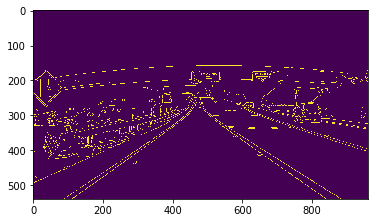

In [8]:
# show the image of edges
plt.imshow(edges)

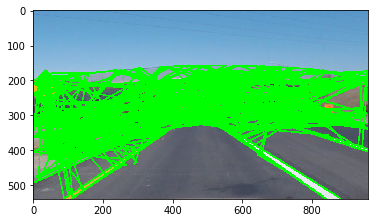

In [9]:
# show the image. THis image are in hough transform
plt.imshow(img)